In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('KNN_Project_Data')

In [5]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
XVPM            1000 non-null float64
GWYH            1000 non-null float64
TRAT            1000 non-null float64
TLLZ            1000 non-null float64
IGGA            1000 non-null float64
HYKR            1000 non-null float64
EDFS            1000 non-null float64
GUUB            1000 non-null float64
MGJM            1000 non-null float64
JHZC            1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.0 KB


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
ss = StandardScaler()

In [9]:
scaled_arr = ss.fit_transform(df.drop('TARGET CLASS',axis=1))

In [10]:
scaled_arr

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [11]:
X = pd.DataFrame(data=scaled_arr,columns=df.columns[:-1])

In [12]:
X.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [13]:
y=df['TARGET CLASS']

In [14]:
from sklearn.model_selection import train_test_split

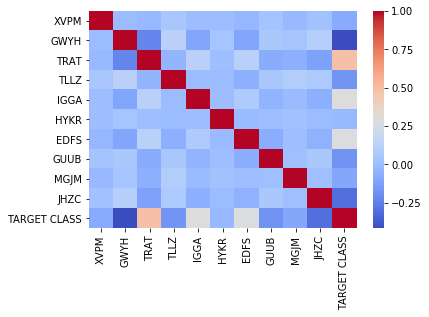

In [16]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [18]:
X_train.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
101,-0.202351,0.676220,-0.785467,0.481152,-0.687326,1.403926,0.703549,-0.144435,-1.522254,-0.633635
425,1.894782,-1.122156,-0.050888,-0.047450,0.393052,-1.188801,-0.618132,-0.703540,-1.036073,0.879122
73,-1.521002,1.270647,0.427048,0.523022,1.425836,-0.685178,-0.217755,-0.906452,-0.342634,-0.968360
701,0.623549,0.835069,-0.148169,-0.183304,-0.874736,-0.917084,1.672398,-1.643227,0.475124,-1.184159
938,-1.185644,-0.397105,0.469173,0.936832,0.473895,-0.903056,0.582068,-1.358655,0.625631,1.065422


In [19]:
len(y_train)

700

In [20]:
len(y_test)

300

# Apply K Nearest Neighbour Model

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
model = KNeighborsClassifier(n_neighbors=1)

In [23]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [24]:
ypred = model.predict(X_test)

In [25]:
np.mean(ypred!=y_test)

0.2833333333333333

In [26]:
np.mean(ypred==y_test)

0.7166666666666667

In [38]:
error_rate=[]
for i in range(1,61):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    error_rate.append(np.mean(ypred!=y_test))

In [39]:
error_rate

[0.2833333333333333,
 0.25666666666666665,
 0.21333333333333335,
 0.22,
 0.20666666666666667,
 0.20333333333333334,
 0.21333333333333335,
 0.22333333333333333,
 0.21,
 0.19666666666666666,
 0.19333333333333333,
 0.2,
 0.18666666666666668,
 0.19333333333333333,
 0.19,
 0.18333333333333332,
 0.18666666666666668,
 0.19666666666666666,
 0.20333333333333334,
 0.2,
 0.20666666666666667,
 0.20333333333333334,
 0.2,
 0.2,
 0.19333333333333333,
 0.20333333333333334,
 0.18333333333333332,
 0.20666666666666667,
 0.2,
 0.19333333333333333,
 0.18666666666666668,
 0.18666666666666668,
 0.18666666666666668,
 0.19,
 0.19,
 0.2,
 0.19333333333333333,
 0.18333333333333332,
 0.18333333333333332,
 0.18333333333333332,
 0.17666666666666667,
 0.17333333333333334,
 0.18,
 0.18,
 0.17333333333333334,
 0.16666666666666666,
 0.17,
 0.17,
 0.16666666666666666,
 0.17,
 0.16333333333333333,
 0.16666666666666666,
 0.17,
 0.17,
 0.18,
 0.17,
 0.16,
 0.16666666666666666,
 0.16666666666666666,
 0.16333333333333333]

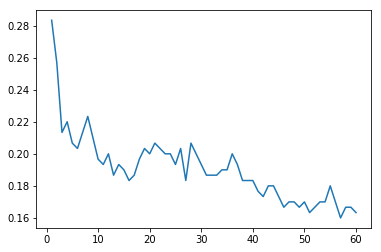

In [40]:
plt.plot(range(1,61),error_rate)

In [41]:
model = KNeighborsClassifier(n_neighbors=57)

In [42]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=57, p=2,
           weights='uniform')

In [43]:
ypred = model.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(ypred,y_test)

array([[121,  23],
       [ 25, 131]], dtype=int64)